# **DATA VISUALIZATION**

##### Load MRI scans (.nii.gz)

In [12]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import os

# Path to one sample patient folder
sample_folder = "/home/sanskar-modi/current_working_personal_projects/brain_tumor_segmentation/artifacts/data/BraTS-GLI-00005-100"

# Load modalities
modalities = ["t1n", "t1c", "t2f", "t2w"]
images = []

for mod in modalities:
    img_path = os.path.join(sample_folder, f"BraTS-GLI-00005-100-{mod}.nii.gz")
    img = nib.load(img_path)
    images.append(img)


# Inspect dimensions and affine matrix
for i, img in enumerate(images):
    print(f"Modality: {modalities[i]}")
    print(f"Shape: {img.shape}")
    print(f"Affine matrix: {img.affine}")
    print()

Modality: t1n
Shape: (182, 218, 182)
Affine matrix: [[  -1.   -0.    0.   90.]
 [  -0.    1.   -0. -126.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]

Modality: t1c
Shape: (182, 218, 182)
Affine matrix: [[  -1.   -0.    0.   90.]
 [  -0.    1.   -0. -126.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]

Modality: t2f
Shape: (182, 218, 182)
Affine matrix: [[  -1.   -0.    0.   90.]
 [  -0.    1.   -0. -126.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]

Modality: t2w
Shape: (182, 218, 182)
Affine matrix: [[  -1.   -0.    0.   90.]
 [  -0.    1.   -0. -126.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]



##### Visualize some slices of each modality for a patient

Modality: t1n


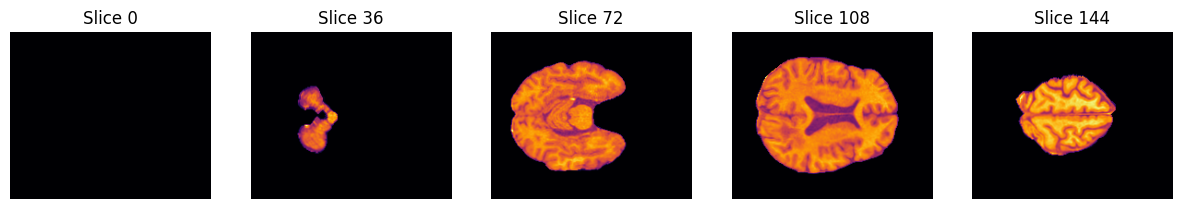

Modality: t1c


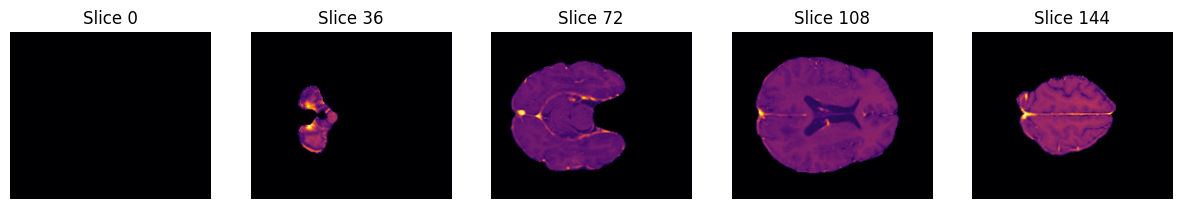

Modality: t2f


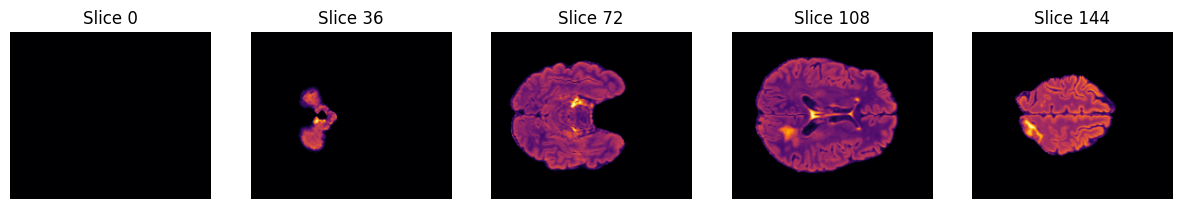

Modality: t2w


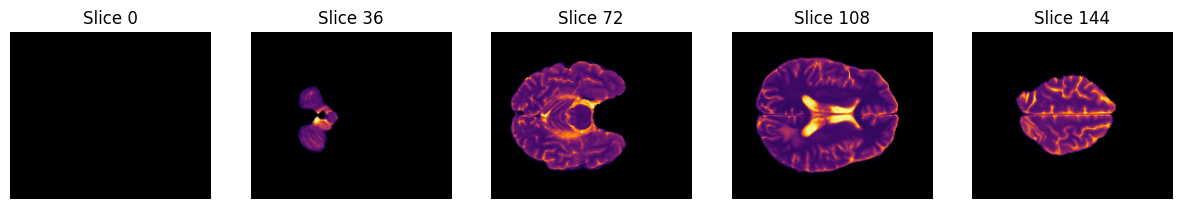

In [ ]:
def plot_slices(image, num_slices=5):
    """Plot multiple slices along the axial plane"""
    data = image.get_fdata()

    fig, axes = plt.subplots(1, num_slices, figsize=(15, 5))
    step = data.shape[2] // num_slices  # Slicing along the Z-axis

    for i in range(num_slices):
        slice_idx = i * step
        axes[i].imshow(data[:, :, slice_idx], cmap="inferno")
        axes[i].set_title(f"Slice {slice_idx}")
        axes[i].axis("off")

    plt.show()


# Plot slices for each modality
for i, img in enumerate(images):
    print(f"Modality: {modalities[i]}")
    plot_slices(img)

##### Visualize some slices of Overall MRI (combined modalities) for each patient


Plotting combined MRI for patient : BraTS-GLI-00005-100


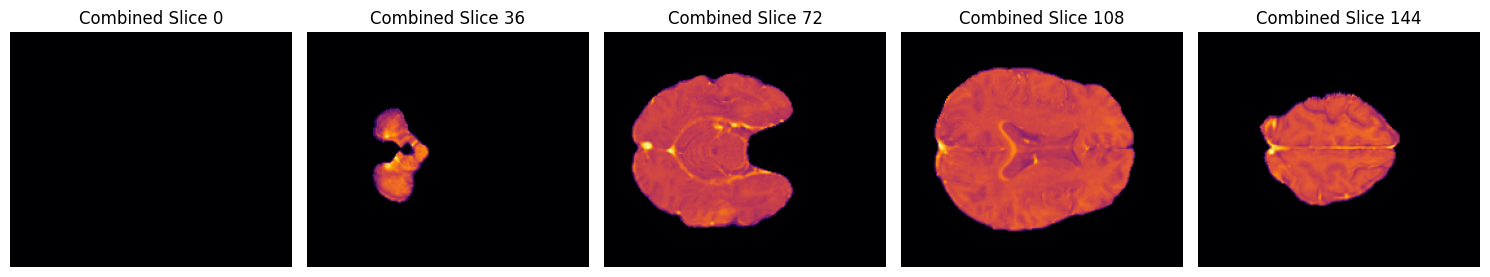


Plotting combined MRI for patient : BraTS-GLI-03063-100


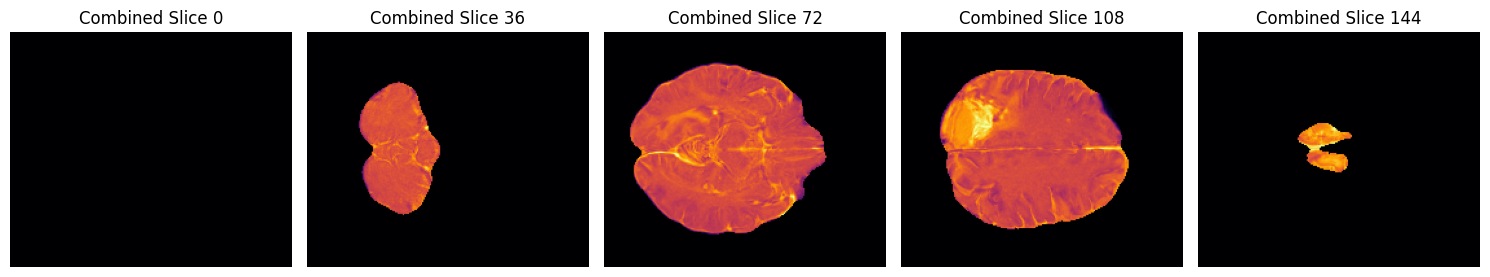

In [22]:
def load_patient_images(patient_folder):
    """
    Load all MRI modalities for a patient and combine into one multi-channel image.
    """

    modalities = ["t1n", "t1c", "t2f", "t2w"]
    images = []

    for modality in modalities:
        file_path = os.path.join(
            patient_folder, f"{os.path.basename(patient_folder)}-{modality}.nii.gz"
        )
        img = nib.load(file_path)
        data = img.get_fdata()
        images.append(data)

    if len(images) > 0:
        # Stack modalities along a new channel dimension
        combined = np.stack(images, axis=-1)  # Shape: (H, W, D, Channels)
        return combined
    else:
        print(f"No valid images found in {patient_folder}")
        return None


def plot_combined_slices(combined_image, num_slices=5):
    """
    Plot multiple slices from the combined multi-channel MRI image.
    """

    if combined_image is None:
        print("No image data to plot.")
        return

    # Average all modalities along the channel dimension
    avg_image = np.mean(combined_image, axis=-1)  # Shape: (H, W, D)

    fig, axes = plt.subplots(1, num_slices, figsize=(15, 5))
    step = avg_image.shape[2] // num_slices

    for i in range(num_slices):
        slice_idx = i * step
        axes[i].imshow(avg_image[:, :, slice_idx], cmap="inferno")
        axes[i].set_title(f"Combined Slice {slice_idx}")
        axes[i].axis("off")

    plt.tight_layout()
    plt.show()


patient_folders = [
    "/home/sanskar-modi/current_working_personal_projects/brain_tumor_segmentation/artifacts/data/BraTS-GLI-00005-100",
    "/home/sanskar-modi/current_working_personal_projects/brain_tumor_segmentation/artifacts/data/BraTS-GLI-03063-100",
]

# Plot combined MRI for each patient
for patient in patient_folders:
    print(f"\nPlotting combined MRI for patient : {os.path.basename(patient)}")
    combined_image = load_patient_images(patient)
    plot_combined_slices(combined_image)